In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("./dataset/Weather_Bhopal.csv")
df

,DATE,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
0,1/1/2020,18.5,9.7,0.0
1,1/2/2020,20.3,12.0,0.0
2,1/3/2020,20.7,14.0,0.0
3,1/4/2020,20.5,11.0,0.0
4,1/5/2020,17.0,7.2,0.0
...,...,...,...,...
451,3/27/2021,33.7,17.0,0.0
452,3/28/2021,36.8,18.4,0.0
453,3/29/2021,38.9,19.2,0.0
454,3/30/2021,41.0,20.0,0.0


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

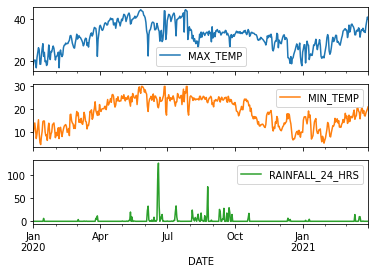

In [ ]:
df.set_index('DATE')[["MAX_TEMP","MIN_TEMP","RAINFALL_24_HRS"]].plot(subplots=True)

In [ ]:
input_df= df[["MAX_TEMP","MIN_TEMP","RAINFALL_24_HRS"]]
input_df.head()

,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
0,18.5,9.7,0.0
1,20.3,12.0,0.0
2,20.7,14.0,0.0
3,20.5,11.0,0.0
4,17.0,7.2,0.0


In [ ]:
input_df.describe()

,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
count,456.000000,456.000000,456.00000
mean,32.059430,18.298465,2.05693
std,6.042076,6.088542,9.35162
min,17.000000,4.600000,0.00000
25%,28.400000,13.400000,0.00000
50%,32.500000,18.600000,0.00000
75%,35.500000,24.000000,0.00000
max,44.500000,29.900000,126.20000


In [ ]:
sca = MinMaxScaler()
data_sca = sca.fit_transform(input_df)

In [ ]:
X= data_sca
Y= data_sca[:,-1]


In [ ]:
xtrain, xtest, ytrain,ytest = train_test_split(X,Y, shuffle=False)

In [ ]:
# print(xtrain.shape)
# xtrain

In [ ]:
TimeseriesGenerator(xtrain, ytrain, length=5, sampling_rate=1, batch_size=1)[0]

(array([[[0.05454545, 0.20158103, 0.        ],
         [0.12      , 0.29249012, 0.        ],
         [0.13454545, 0.3715415 , 0.        ],
         [0.12727273, 0.25296443, 0.        ],
         [0.        , 0.1027668 , 0.        ]]]),
 array([0.]))

In [ ]:
win_len=10
# num_feature=3
train_generator= TimeseriesGenerator(xtrain, ytrain, length=win_len,sampling_rate=1, batch_size=32)
test_generator= TimeseriesGenerator(xtest, ytest, length=win_len,sampling_rate=1, batch_size=32)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [ ]:
type(train_generator)

keras.preprocessing.sequence.TimeseriesGenerator

In [ ]:
train_generator

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(win_len, 3), activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dense(5, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            4608      
                                                                 
 lstm_1 (LSTM)               (None, 10, 32)            8320      
                                                                 
 dropout (Dropout)           (None, 10, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 10, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 10, 32)            0

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping =  EarlyStopping(monitor='val_loss', mode='min', patience=3)

In [ ]:
model.compile( loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
len(test_generator)

4

In [ ]:
hist = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

C:\Users\meet1\AppData\Local\Temp\ipykernel_19148\769705248.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)


Epoch 1/100
11/11 [==============================] - 45s 481ms/step - loss: 0.0082 - mean_absolute_error: 0.0389 - val_loss: 0.0025 - val_mean_absolute_error: 0.0494
Epoch 2/100
11/11 [==============================] - 1s 44ms/step - loss: 0.0081 - mean_absolute_error: 0.0358 - val_loss: 3.9011e-04 - val_mean_absolute_error: 0.0165
Epoch 3/100
11/11 [==============================] - 0s 44ms/step - loss: 0.0074 - mean_absolute_error: 0.0340 - val_loss: 0.0010 - val_mean_absolute_error: 0.0315
Epoch 4/100
11/11 [==============================] - 1s 45ms/step - loss: 0.0076 - mean_absolute_error: 0.0364 - val_loss: 5.8404e-04 - val_mean_absolute_error: 0.0225
Epoch 5/100
11/11 [==============================] - 1s 45ms/step - loss: 0.0075 - mean_absolute_error: 0.0336 - val_loss: 7.3760e-04 - val_mean_absolute_error: 0.0260
Epoch 6/100
11/11 [==============================] - 1s 48ms/step - loss: 0.0075 - mean_absolute_error: 0.0357 - val_loss: 7.0463e-04 - val_mean_absolute_error: 0.025

In [ ]:
ypred= model.predict(test_generator)

4/4 [==============================] - 16s 28ms/step


In [ ]:
ypred

array([[0.00371494],
       [0.0040985 ],
       [0.00490909],
       [0.00664304],
       [0.00666807],
       [0.00785284],
       [0.00621027],
       [0.00464048],
       [0.00381586],
       [0.00309817],
       [0.0025369 ],
       [0.00243326],
       [0.00243543],
       [0.00244619],
       [0.00260217],
       [0.00271767],
       [0.00277289],
       [0.00281918],
       [0.00273637],
       [0.00286805],
       [0.00273071],
       [0.00299216],
       [0.00353824],
       [0.00364731],
       [0.00386836],
       [0.00561384],
       [0.00604414],
       [0.00615779],
       [0.00625339],
       [0.00488113],
       [0.0046503 ],
       [0.00632001],
       [0.00733124],
       [0.00571101],
       [0.00491233],
       [0.00330234],
       [0.00251694],
       [0.00267174],
       [0.00287736],
       [0.00352314],
       [0.00423821],
       [0.00410041],
       [0.00361887],
       [0.00285898],
       [0.0027461 ],
       [0.00271273],
       [0.00288202],
       [0.002

In [ ]:
df_pred = pd.concat([pd.DataFrame(ypred), pd.DataFrame(xtest[:, 1:][win_len:]) ], axis=1)

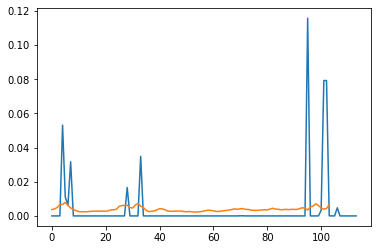

In [ ]:
plt.plot(ytest)
plt.plot(ypred)
plt.show()

In [ ]:
ai_mc= pd.DataFrame(xtest[:, 1:][win_len:])
ai_mc

,0,1
0,0.110672,0.0
1,0.079051,0.0
2,0.102767,0.0
3,0.098814,0.0
4,0.150198,0.0
...,...,...
99,0.490119,0.0
100,0.545455,0.0
101,0.577075,0.0
102,0.608696,0.0


In [ ]:
df_final = sca.inverse_transform(df_pred)
df_final

array([[1.71021608e+01, 7.40000000e+00, 0.00000000e+00],
       [1.71127088e+01, 6.60000000e+00, 0.00000000e+00],
       [1.71349999e+01, 7.20000000e+00, 0.00000000e+00],
       [1.71826837e+01, 7.10000000e+00, 0.00000000e+00],
       [1.71833720e+01, 8.40000000e+00, 0.00000000e+00],
       [1.72159530e+01, 9.60000000e+00, 0.00000000e+00],
       [1.71707824e+01, 1.02000000e+01, 0.00000000e+00],
       [1.71276131e+01, 1.04000000e+01, 0.00000000e+00],
       [1.71049361e+01, 8.90000000e+00, 0.00000000e+00],
       [1.70851997e+01, 1.08000000e+01, 0.00000000e+00],
       [1.70697647e+01, 9.50000000e+00, 0.00000000e+00],
       [1.70669145e+01, 7.80000000e+00, 0.00000000e+00],
       [1.70669744e+01, 1.01000000e+01, 0.00000000e+00],
       [1.70672702e+01, 9.90000000e+00, 0.00000000e+00],
       [1.70715597e+01, 9.90000000e+00, 0.00000000e+00],
       [1.70747359e+01, 1.52000000e+01, 0.00000000e+00],
       [1.70762545e+01, 1.66000000e+01, 0.00000000e+00],
       [1.70775275e+01, 1.67000

In [ ]:
df_main= input_df[ypred.shape[0]*-1:]
df_main.count()

MAX_TEMP           104
MIN_TEMP           104
RAINFALL_24_HRS    104
dtype: int64

In [ ]:
df_main['Rain_pred'] = df_final[:, 0]
df_main


C:\Users\meet1\AppData\Local\Temp\ipykernel_19148\574704383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Rain_pred'] = df_final[:, 0]


,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS,Rain_pred
352,21.4,7.4,0.0,17.102161
353,21.7,6.6,0.0,17.112709
354,23.4,7.2,0.0,17.135000
355,24.5,7.1,0.0,17.182684
356,25.6,8.4,0.0,17.183372
...,...,...,...,...
451,33.7,17.0,0.0,17.167561
452,36.8,18.4,0.0,17.128509
453,38.9,19.2,0.0,17.109340
454,41.0,20.0,0.0,17.119937


<AxesSubplot:>

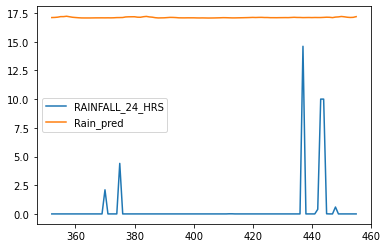

In [ ]:
df_main[['RAINFALL_24_HRS', 'Rain_pred']].plot()